In [1]:
'''Added normalization additionally, and this improved the training and validation accuracy by a large factor.
Improvements that can be done are: 
1. Improve the dataset, make the data more uniformed among different classes.
2. Change the resizing factor to some other scale to increase accuracy.
99% validation still isn't acceptable due to errors in prediction. Lot of effort required in cleaning and creating a good dataset.  '''

"Added normalization additionally, and this improved the training and validation accuracy by a large factor.\nImprovements that can be done are: \n1. Improve the dataset, make the data more uniformed among different classes.\n2. Change the resizing factor to some other scale to increase accuracy.\n99% validation still isn't acceptable due to errors in prediction. Lot of effort required in cleaning and creating a good dataset.  "

In [2]:
#SIGN RECOGNITION
import torch
from torchvision import datasets,transforms,models
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F



data_path_train = 'Images\\train'
data_path_validation = 'Images\\validation'

transform_train = transforms.Compose([transforms.Resize((96,96)),
                                      transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=1,contrast=1,saturation=1),
                                      transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
training_dataset = datasets.ImageFolder(root=data_path_train, transform = transform_train)
training_loader = torch.utils.data.DataLoader(
    dataset=training_dataset,
    batch_size = 200,
    shuffle=True    
)

transform_validation = transforms.Compose([transforms.Resize((96,96)),transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
validation_dataset = datasets.ImageFolder(root=data_path_validation,transform = transform_validation)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=100,shuffle=True)


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
dataiter = iter(training_loader)

In [5]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image*np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

In [6]:
classes = ('Left Turn','No Entry','No Horn','No Left Turn','No Stoppping','No U-Turn','Pedestrian Crossing','Right Turn','Speed Breaker','Junction Ahead')

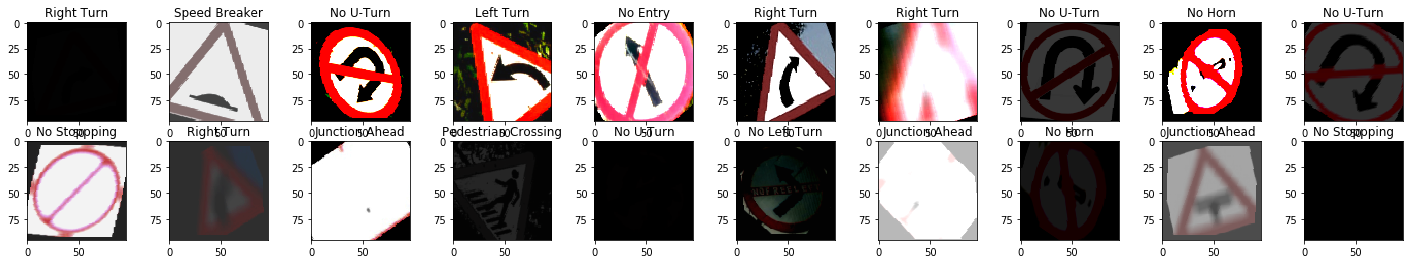

In [7]:
dataiter=iter(training_loader)
images,labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.set_title(classes[labels[i].item()])

In [8]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,16,3,1,padding=1)
    self.conv2 = nn.Conv2d(16,32,3,1,padding=1)
    self.conv3 = nn.Conv2d(32,64,3,1,padding=1)
    self.fc1 = nn.Linear(12*12*64,600)
    self.dropout1 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(600,10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x,2,2)
    x = x.view(-1, 12*12*64)
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x = self.fc2(x)
    return x

In [9]:
model = NeuralNet().to(device)
model

NeuralNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=9216, out_features=600, bias=True)
  (dropout1): Dropout(p=0.5)
  (fc2): Linear(in_features=600, out_features=10, bias=True)
)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [11]:
'''epochs = 10
training_loss_history = []
training_accuracy_history = []
validation_loss_history = []
validation_accuracy_history = []

for e in range(epochs):
    training_loss = 0.0
    training_accuracy = 0.0 
    validation_loss = 0.0
    validation_accuracy = 0.0
    for inputs,labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _,prediction = torch.max(outputs,1)
        training_accuracy += torch.sum(prediction==labels.data)
        training_loss+=loss.item()
    else:
        with torch.no_grad():
            
            for val_inputs,val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_inputs.to(device)
                val_outputs = model(val_inputs)
                validation_loss = criterion(val_outputs, val_labels)
                
                _, val_preds = torch.max(val_outputs,1)
                validation_loss += val_loss.item()
                validation_accuracy += torch.sum(val_preds==val_labels.data)
        
        
        print('epoch number:',e+1)
        
        training_epoch_loss = training_loss/len(training_loader)
        training_epoch_accuracy = training_accuracy.float()/len(training_loader)
        training_loss_history.append(training_epoch_loss)
        training_accuracy_history.append(training_epoch_accuracy)
        print('training loss:{:.4f}, accuracy{:.4f}'.format(training_epoch_loss, training_epoch_accuracy.item()))
        
        validation_epoch_loss = validation_loss/len(validation_loader)
        validation_epoch_accuracy = validation_accuracy.float()/len(validation_loader)
        validation_loss_history.append(validation_epoch_loss)
        validation_accuracy_history.append(validation_epoch_accuracy)
        print('validation loss:{:.4f}, accuracy{:.4f}'.format(validation_epoch_loss,validation_epoch_accuracy.item()))
'''        
        

"epochs = 10\ntraining_loss_history = []\ntraining_accuracy_history = []\nvalidation_loss_history = []\nvalidation_accuracy_history = []\n\nfor e in range(epochs):\n    training_loss = 0.0\n    training_accuracy = 0.0 \n    validation_loss = 0.0\n    validation_accuracy = 0.0\n    for inputs,labels in training_loader:\n        inputs = inputs.to(device)\n        labels = labels.to(device)\n        outputs = model(inputs)\n        loss = criterion(outputs, labels)\n        \n        optimizer.zero_grad()\n        loss.backward()\n        optimizer.step()\n        \n        _,prediction = torch.max(outputs,1)\n        training_accuracy += torch.sum(prediction==labels.data)\n        training_loss+=loss.item()\n    else:\n        with torch.no_grad():\n            \n            for val_inputs,val_labels in validation_loader:\n                val_inputs = val_inputs.to(device)\n                val_labels = val_inputs.to(device)\n                val_outputs = model(val_inputs)\n             

In [12]:
epochs = 12
running_loss_history = []
running_correct_history = list()
validation_loss_history = []
validation_accuracy_history = []

for e in range(epochs):
  running_loss = 0.0 
  running_corrects = 0.0
  val_running_loss = 0.0  
  val_running_corrects = 0.0
  for inputs,labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, prediction = torch.max(outputs,1)
    running_corrects+=torch.sum(prediction == labels.data)
    running_loss+=loss.item()
  else:
    with torch.no_grad():
      
      for val_inputs,val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds= torch.max(val_outputs,1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds==val_labels.data)
        
    
    
    print('epoch number:',e+1)
    
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_correct_history.append(epoch_acc)
    print('training loss:{:.4f},acc:{:.4f}'.format(epoch_loss, epoch_acc.item()))
    
    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)
    validation_loss_history.append(val_epoch_loss)
    validation_accuracy_history.append(val_epoch_acc)
    print('validation loss:{:.4f},acc:{:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))

    

epoch number: 1
training loss:0.0107,acc:0.2546
validation loss:0.0164,acc:0.4948
epoch number: 2
training loss:0.0077,acc:0.5021
validation loss:0.0078,acc:0.7454
epoch number: 3
training loss:0.0056,acc:0.6455
validation loss:0.0048,acc:0.8367
epoch number: 4
training loss:0.0046,acc:0.7040
validation loss:0.0039,acc:0.8687
epoch number: 5
training loss:0.0040,acc:0.7500
validation loss:0.0031,acc:0.8897
epoch number: 6
training loss:0.0036,acc:0.7774
validation loss:0.0023,acc:0.9297
epoch number: 7
training loss:0.0033,acc:0.7997
validation loss:0.0025,acc:0.9160
epoch number: 8
training loss:0.0031,acc:0.8086
validation loss:0.0021,acc:0.9350
epoch number: 9
training loss:0.0029,acc:0.8252
validation loss:0.0021,acc:0.9440
epoch number: 10
training loss:0.0026,acc:0.8403
validation loss:0.0015,acc:0.9530
epoch number: 11
training loss:0.0025,acc:0.8450
validation loss:0.0015,acc:0.9577
epoch number: 12
training loss:0.0024,acc:0.8543
validation loss:0.0011,acc:0.9660


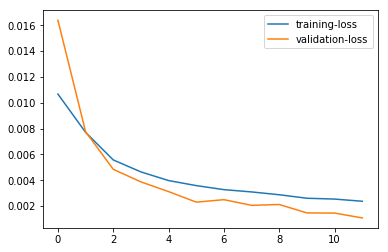

In [13]:
plt.plot(running_loss_history, label='training-loss')
plt.plot(validation_loss_history, label='validation-loss')
plt.legend()

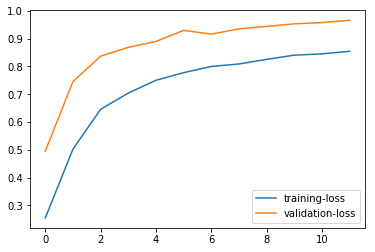

In [14]:
plt.plot(running_correct_history, label='training-loss')
plt.plot(validation_accuracy_history,label='validation-loss')
plt.legend()

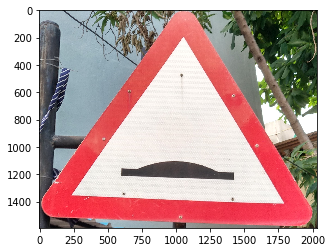

In [23]:
import PIL
img = PIL.Image.open('t.jpg')
plt.imshow(img)

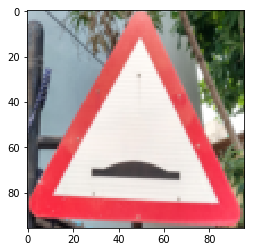

In [24]:
img = transform_validation(img)
plt.imshow(im_convert(img))

In [26]:
image = img.to(device).unsqueeze(0)
#model = torch.load('model.pt')
output = model(image)
_,pred = torch.max(output,1)
print(classes[pred.item()])

Speed Breaker


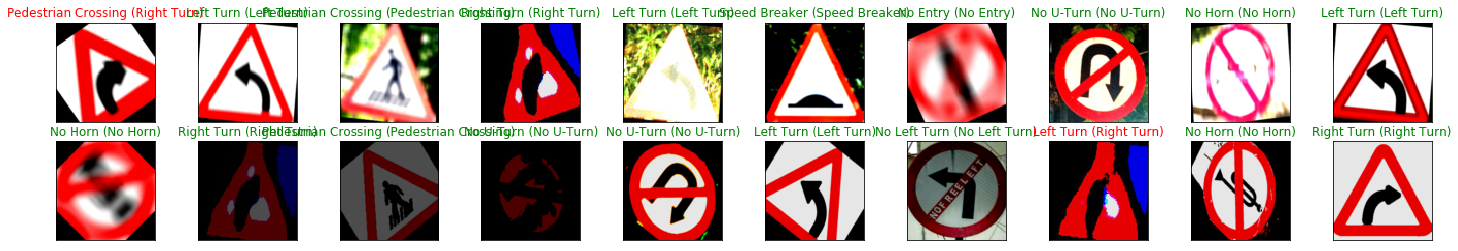

In [27]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

In [28]:
torch.save(model,'model_31Aug.pt')

c:\users\srikanth\appdata\local\programs\python\python36\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [29]:
model.state_dict()

OrderedDict([('conv1.weight', tensor([[[[ 0.1113,  0.0866, -0.1098],
                        [ 0.1490,  0.1676,  0.1234],
                        [ 0.0362,  0.0691,  0.1019]],
              
                       [[ 0.1399,  0.0671, -0.1292],
                        [ 0.0907,  0.0353, -0.0233],
                        [-0.0668,  0.1284,  0.1610]],
              
                       [[ 0.1045,  0.1576,  0.0959],
                        [ 0.1599,  0.1829, -0.0736],
                        [-0.0692,  0.0347,  0.0902]]],
              
              
                      [[[-0.2018,  0.0479,  0.0205],
                        [-0.1107, -0.1615, -0.1056],
                        [ 0.0803,  0.0871, -0.1255]],
              
                       [[ 0.1285, -0.0809,  0.0913],
                        [-0.1570, -0.0409,  0.0485],
                        [-0.0759,  0.1304, -0.0584]],
              
                       [[-0.1759, -0.1908, -0.0542],
                        [ 0.1542,  0.169

In [30]:
torch.save(model.state_dict(),'model_state_dict_31Aug.pt')

In [31]:
model.state_dict()

OrderedDict([('conv1.weight', tensor([[[[ 0.1113,  0.0866, -0.1098],
                        [ 0.1490,  0.1676,  0.1234],
                        [ 0.0362,  0.0691,  0.1019]],
              
                       [[ 0.1399,  0.0671, -0.1292],
                        [ 0.0907,  0.0353, -0.0233],
                        [-0.0668,  0.1284,  0.1610]],
              
                       [[ 0.1045,  0.1576,  0.0959],
                        [ 0.1599,  0.1829, -0.0736],
                        [-0.0692,  0.0347,  0.0902]]],
              
              
                      [[[-0.2018,  0.0479,  0.0205],
                        [-0.1107, -0.1615, -0.1056],
                        [ 0.0803,  0.0871, -0.1255]],
              
                       [[ 0.1285, -0.0809,  0.0913],
                        [-0.1570, -0.0409,  0.0485],
                        [-0.0759,  0.1304, -0.0584]],
              
                       [[-0.1759, -0.1908, -0.0542],
                        [ 0.1542,  0.169